In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import lines
from sklearn.preprocessing import normalize

# set parameters
colors = ['b','orange','g','r','saddlebrown','m','grey','y','c']
fs = 14

In [2]:
# create individual projection, set phenotype
ind = np.array(sorted(np.random.random(20), key=lambda n:-abs(n))) + 0.2*np.random.random(20)
pc1, pc2, pc3 = 0,3,4
n1, n2, n3 = 20,5,5 # sample sizes for each dominant loading type
cos = normalize(np.random.exponential(scale=3, size=(1,20)) + 
                  20*np.identity(20)[pc1] + 12*np.identity(20)[pc2] + 12*np.identity(20)[pc3])[0]

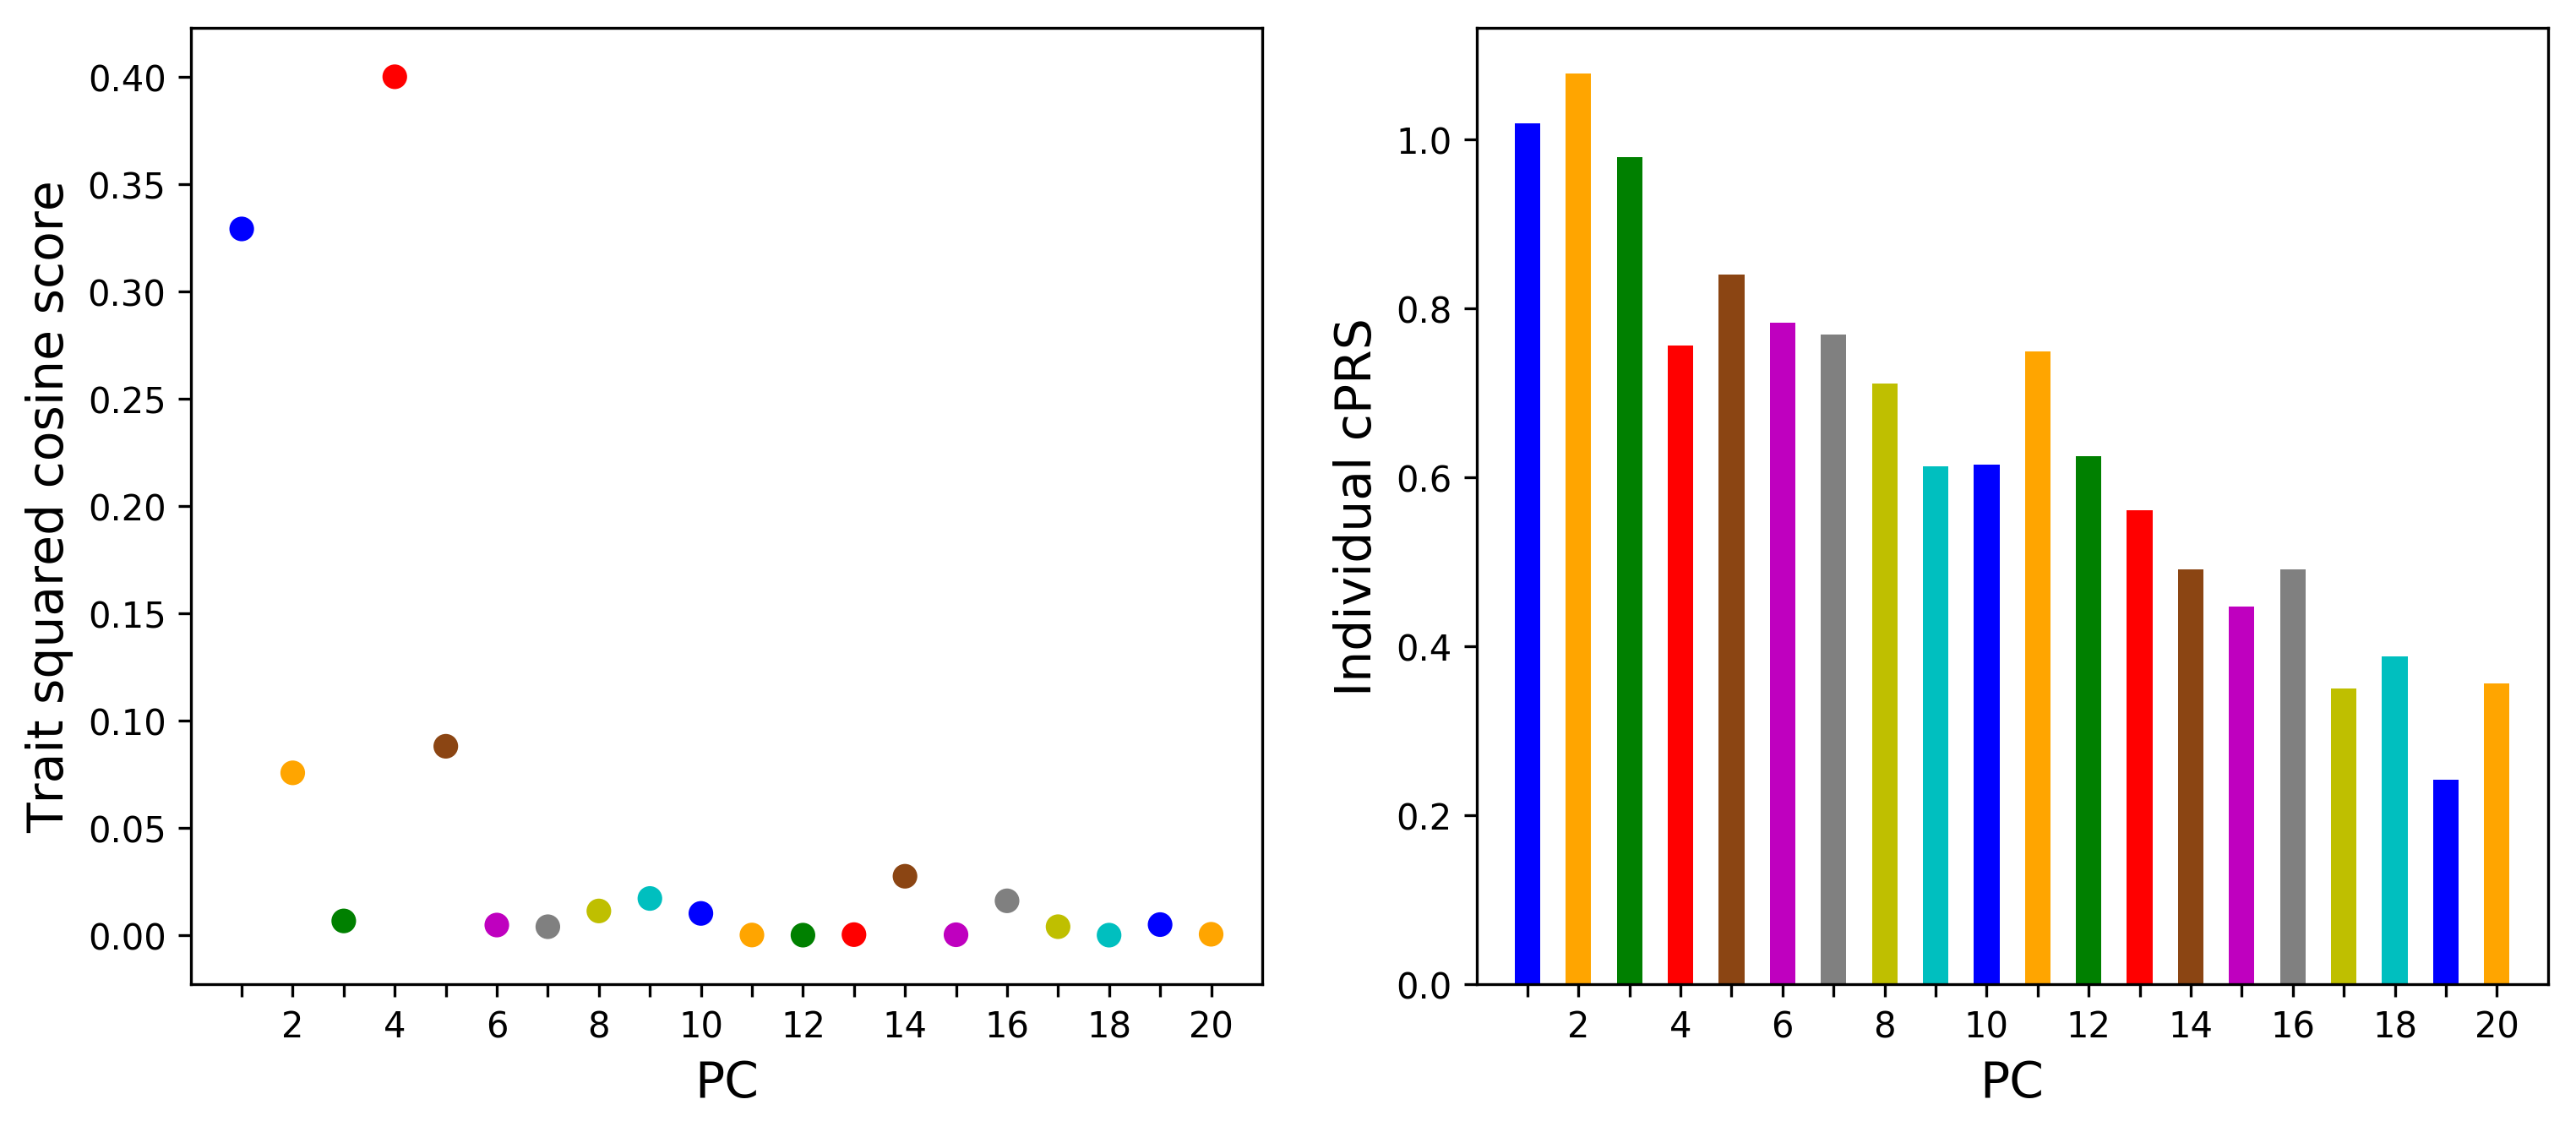

In [3]:
plt.clf()
# show individual genetic score
fig = plt.figure(figsize=(12,5), dpi=300)
ax2 = plt.subplot(122)
plt.bar(np.arange(1,len(ind)+1), ind, width=0.5, color=[colors[i%len(colors)] for i in range(len(ind))])
plt.ylabel('Individual cPRS', fontsize=fs), plt.xlabel('PC', fontsize=fs)

# show phenotype factor score
ax1 = plt.subplot(121,sharex=ax2)
plt.scatter(np.arange(1,len(cos)+1), cos**2, c=[colors[i%len(colors)] for i in range(len(cos))])
plt.xticks(np.arange(1,len(ind)+1), [str(i) if i%2==0 else '' for i in np.arange(1,len(ind)+1) ])
plt.ylabel('Trait squared cosine score', fontsize=fs), plt.xlabel('PC', fontsize=fs)
plt.xlim([0,21])
plt.show()
fig.savefig("pdfs/fig1top.pdf", bbox_inches='tight')

In [4]:
def make_brackets():
    # width, height, distance to label
    w,h,eps = 0.33,0.1, 0.05
    # make lines, labels
    l1,l2 = plt.Line2D([-w, n1-1+w], [-h, -h], color='k',clip_on=False), plt.Line2D([n1-w, n1+n2+n3-1+w], [-h, -h], color='k',clip_on=False)
    label1 = plt.text(n1/2.0,-h-eps,'"Typical" individuals',fontsize=fs,horizontalalignment='center',verticalalignment='top') 
    label2 = plt.text(n1+((n2+n3)/2.0),-h-eps,'"Outliers"',fontsize=fs,horizontalalignment='center',verticalalignment='top')
    # make bracket end ticks
    t1a, t1b = plt.Line2D([-w,-w], [-h,0], color='k',clip_on=False), plt.Line2D([n1-1+w, n1-1+w], [-h,0], color='k',clip_on=False)
    t2a, t2b = plt.Line2D([n1-w, n1-w], [-h,0], color='k',clip_on=False), plt.Line2D([n1+n2+n3-1+w, n1+n2+n3-1+w], [-h,0], color='k',clip_on=False)
    return([l1,l2,t1a,t1b,t2a,t2b],[label1,label2])

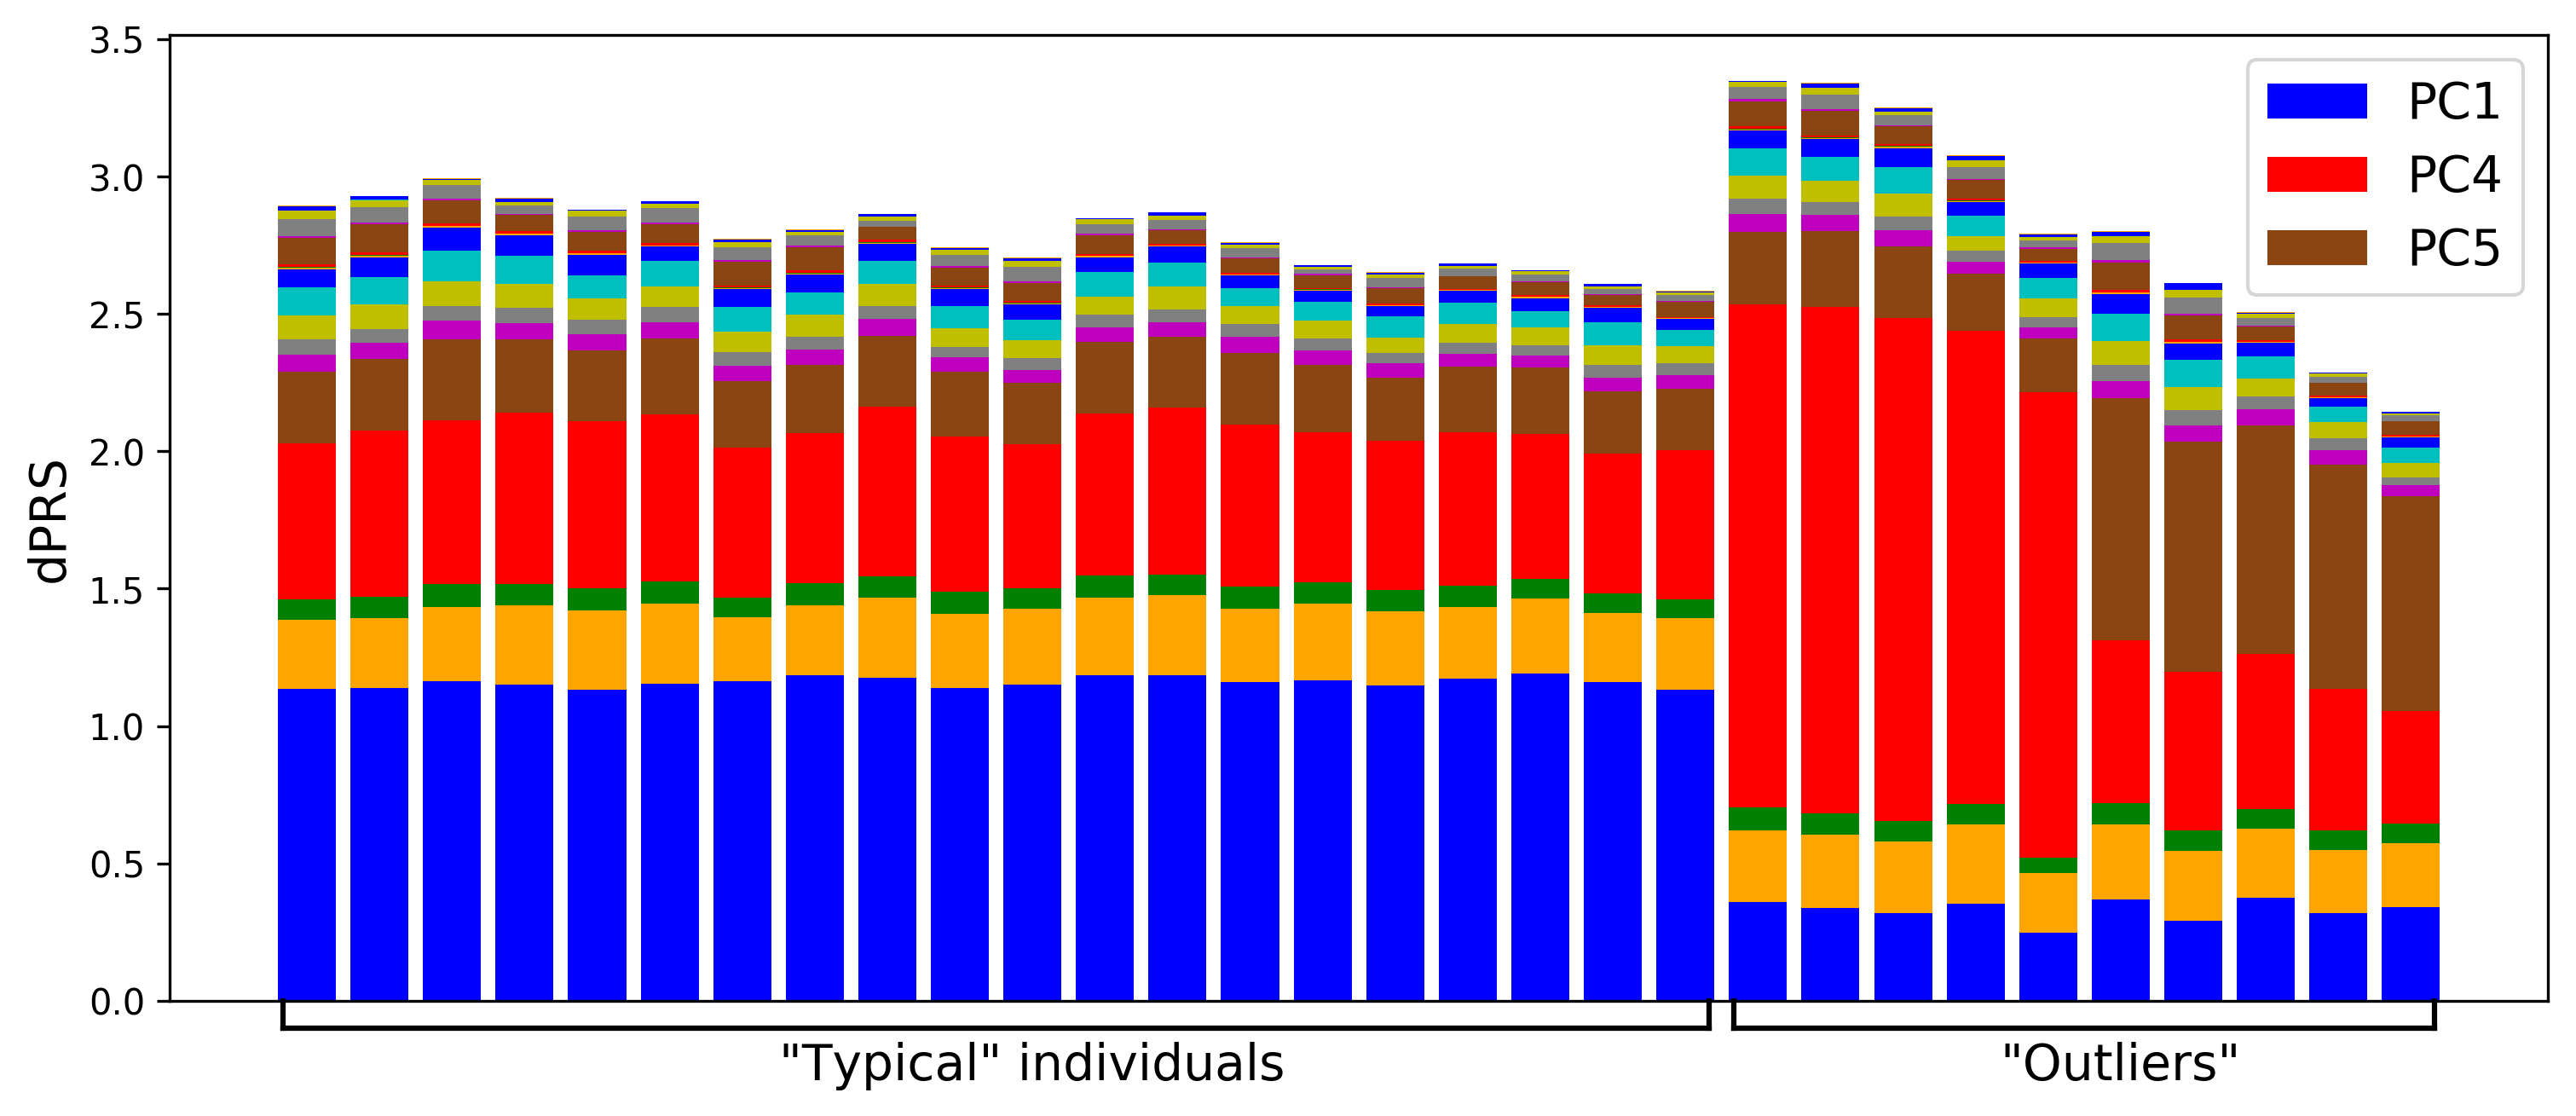

In [5]:
figt = plt.figure(figsize=(12,5), dpi=300)
ax3 = plt.subplot(111)
typical = np.array([sorted(x, key=lambda n:-abs(n)) for x in np.random.random((n1,20))]) + 0.1*np.random.random((n1,20)) + np.identity(20)[pc1]
atypical = np.array([sorted(x, key=lambda n:-abs(n)) for x in np.random.random((n2,20))]) + 0.1*np.random.random((n2,20)) + 2*np.identity(20)[pc2] - 0.4*np.identity(20)[pc1]
btypical = np.array([sorted(x, key=lambda n:-abs(n)) for x in np.random.random((n3,20))]) + 0.1*np.random.random((n2,20)) + 2*np.identity(20)[pc3] - 0.4*np.identity(20)[pc1]
typical = np.array(sorted(list(typical),key=lambda x:-sum(x)))
atypical = np.array(sorted(list(atypical),key=lambda x:-sum(x)))
btypical = np.array(sorted(list(btypical),key=lambda x:-sum(x)))
inds = np.vstack((typical, atypical, btypical))
scores = inds*cos
p = []
for pc in range(scores.shape[1]):
    p.append(plt.bar(np.arange(scores.shape[0]),scores[:,pc], bottom=np.sum(scores[:,:pc],axis=1),color=colors[pc%len(colors)]))
plt.legend([p[i] for i in np.argsort(-np.sum(scores, axis=0))[:3]], ['PC{}'.format(i+1) for i in np.argsort(-np.sum(scores, axis=0))[:3]], fontsize=fs)
lines, labels = make_brackets()
for line in lines:
    ax3.add_line(line)
plt.xticks([]), plt.ylabel('dPRS', fontsize=fs)
plt.show()
figt.savefig("pdfs/fig1topb.pdf", bbox_inches='tight')

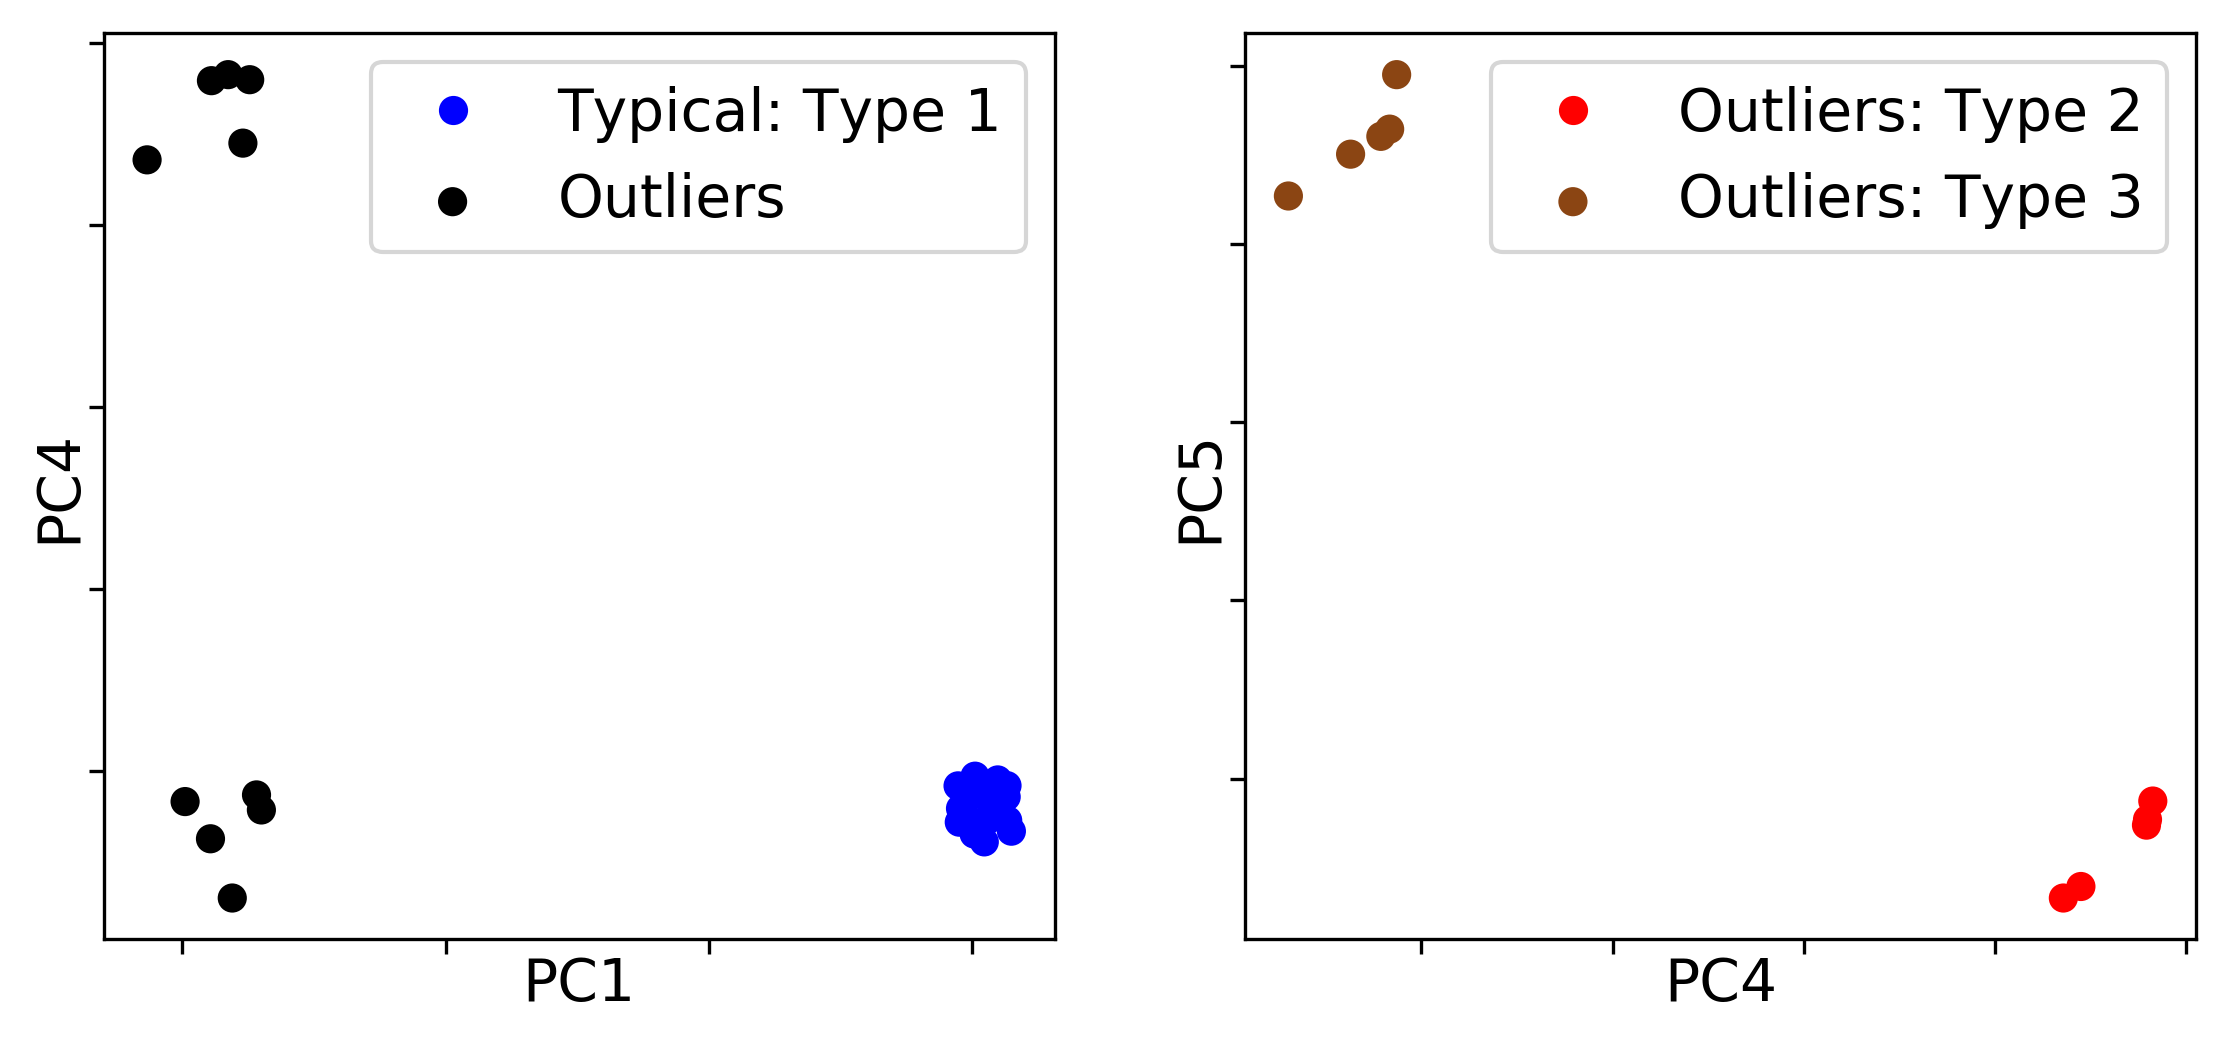

In [6]:
figo = plt.figure(figsize=(9,4), dpi=300)
plt.subplot(121)
plt.plot([],[],'bo')
plt.scatter(inds[:,pc1][::-1],inds[:,pc2][::-1],color=['k' if i<(n2+n3) else 'b' for i in range(inds.shape[0])])
plt.legend(['Typical: Type 1','Outliers'], fontsize=fs)
plt.tick_params(labelbottom='off',labelleft='off')
plt.xlabel('PC{}'.format(pc1+1),fontsize=fs),plt.ylabel('PC{}'.format(pc2+1),fontsize=fs)

plt.subplot(122)
plt.plot([],[],'ro')
plt.scatter(inds[n1:,pc2][::-1],inds[n1:,pc3][::-1],color=['saddlebrown' if i<n3 else 'r' for i in range(n2+n3)])
plt.legend(['Outliers: Type 2','Outliers: Type 3'], fontsize=fs)
plt.tick_params(labelbottom='off',labelleft='off')
plt.xlabel('PC{}'.format(pc2+1),fontsize=fs),plt.ylabel('PC{}'.format(pc3+1),fontsize=fs)
plt.show()
figo.savefig("pdfs/fig1topc.pdf", bbox_inches='tight')

/home/users/magu/.local/lib/python2.7/site-packages/matplotlib/cbook.py:2649: UserWarning: Saw kwargs [u'c', u'color'] which are all aliases for u'color'.  Kept value from u'color'
  seen=seen, canon=canonical, used=seen[-1]))


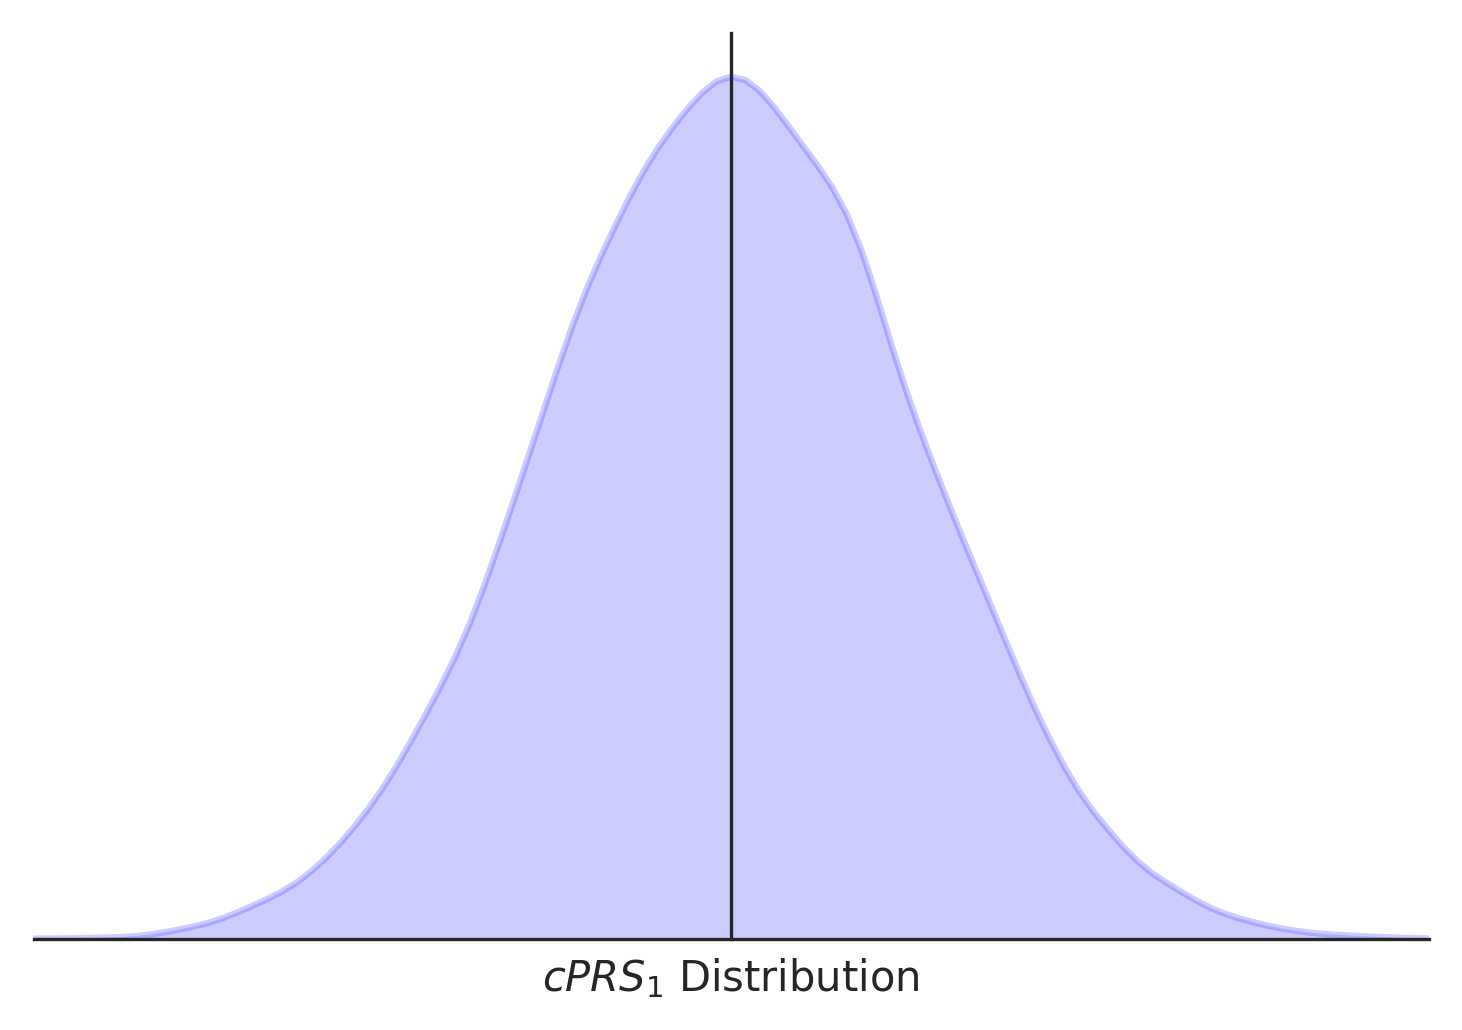

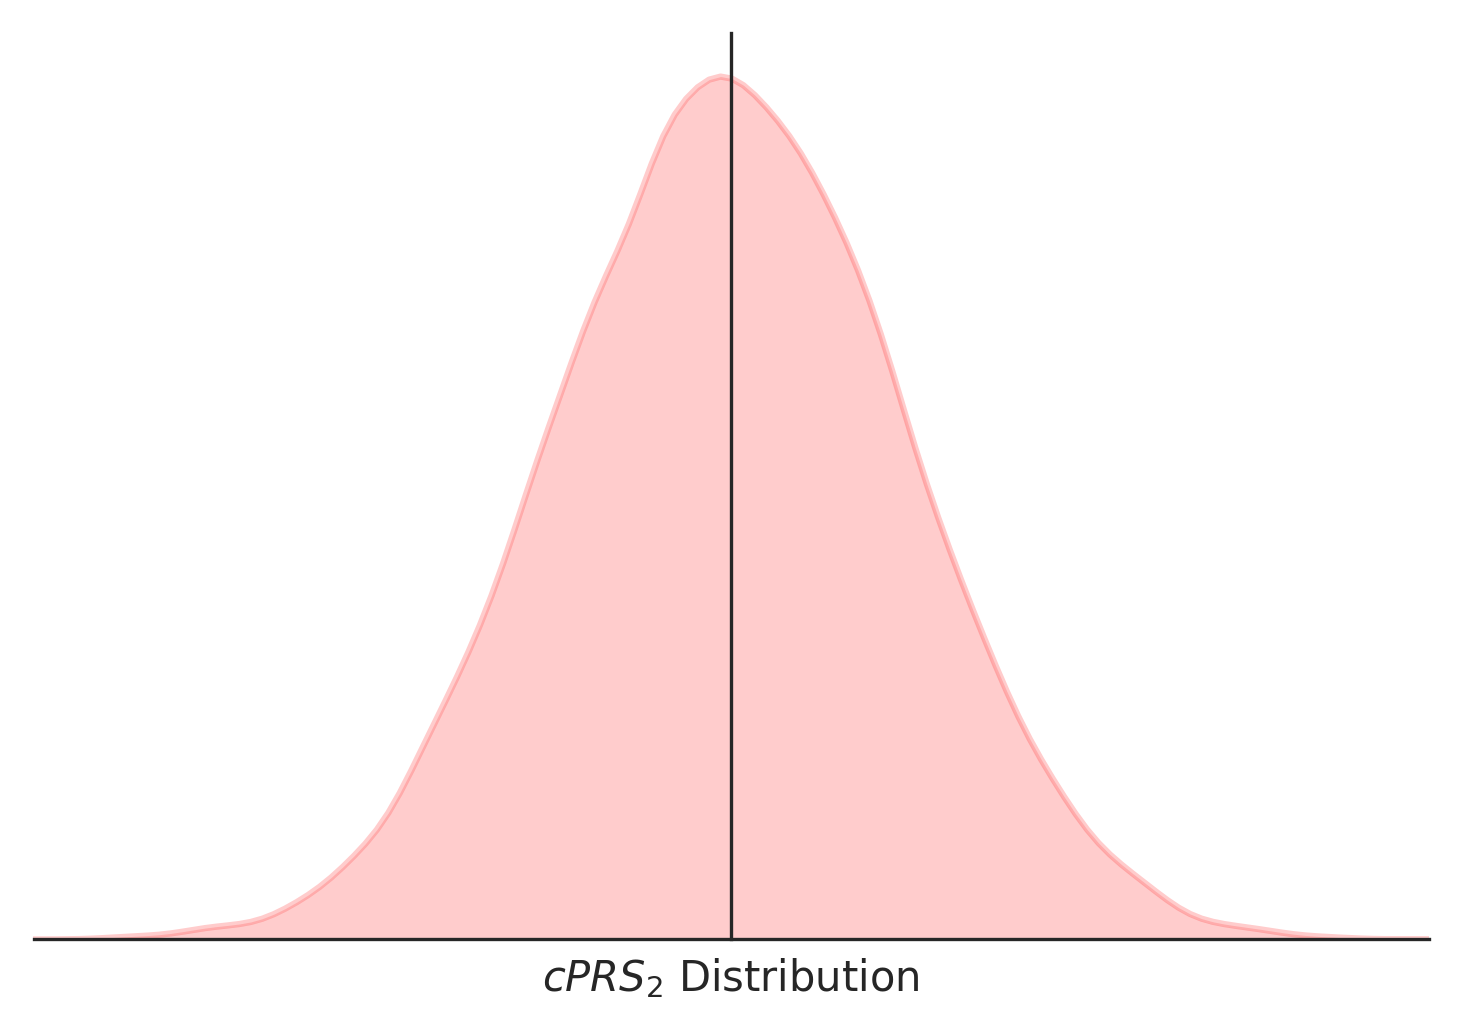

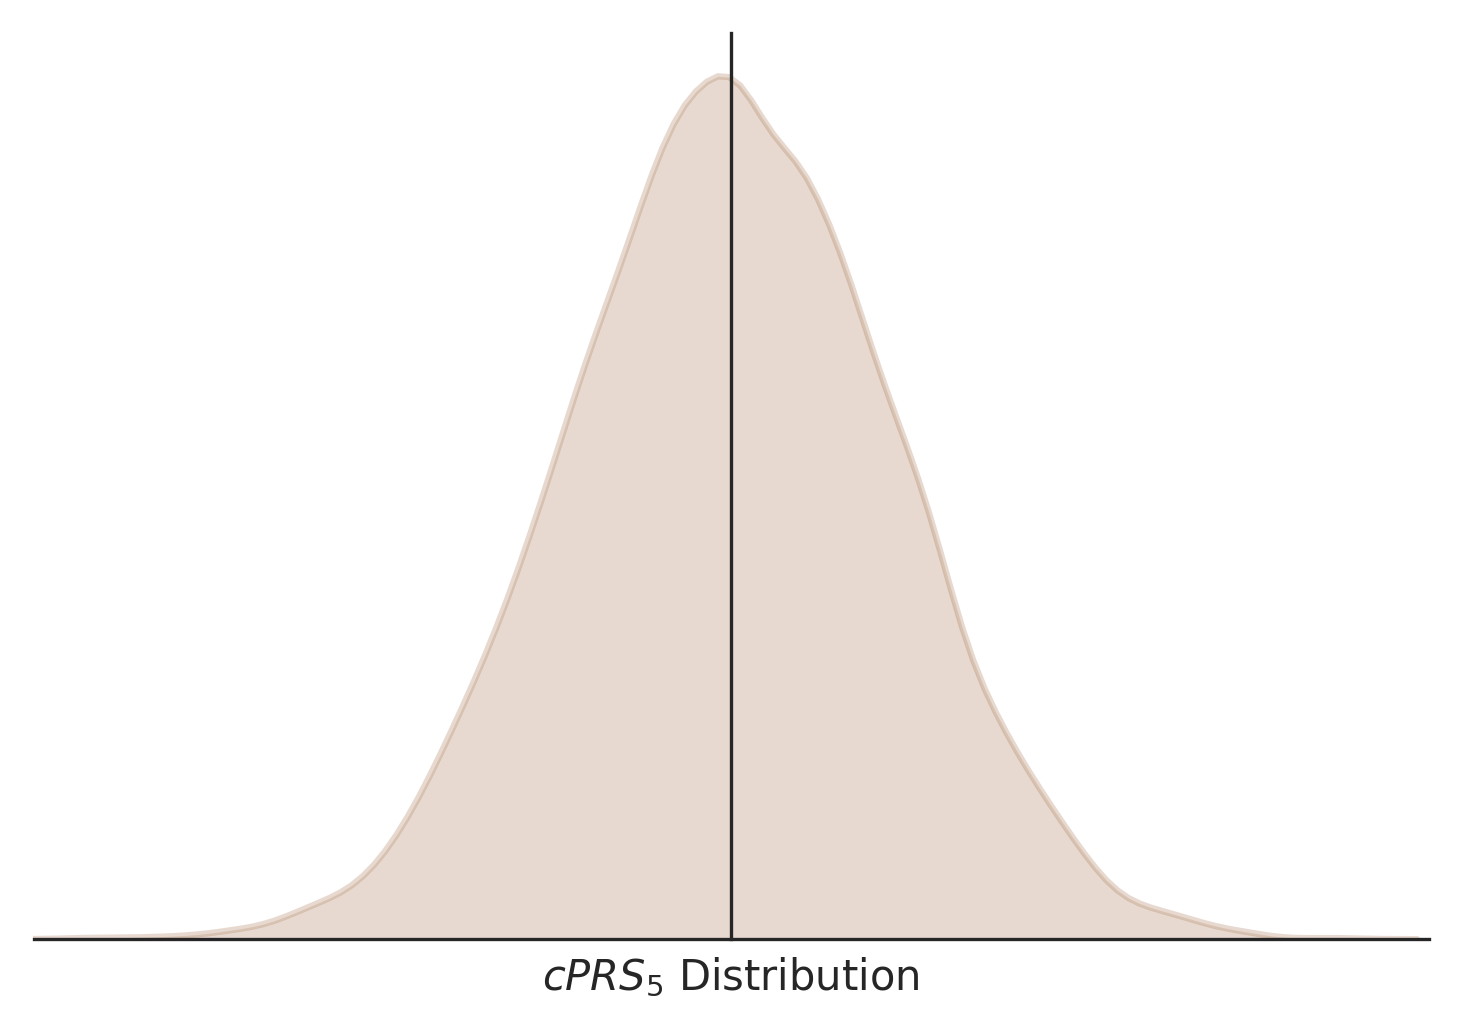

In [7]:
pc1=np.random.normal(0,4,25000)
pc2=np.random.normal(0,3.7,25000)
pc5=np.random.normal(0,3.5,25000)
sns.set_style("white")
sns.despine()
for name,pcs,color in zip(['1','2','5'],[pc1,pc2,pc5],['blue','red','saddlebrown']):
    fig= plt.figure(figsize=(6,4),dpi=300)
    ax = fig.add_subplot(1, 1, 1)
    sns.kdeplot(pcs, shade=True, ax=ax, c=color, alpha=0.2) #.hist(pcs, bins=150, color=color, alpha=0.6)

    # Move y-axis to center, eliminate upper axis
    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    
    # Remove ticks but set xlabel
    ax.get_yaxis().set_ticks([])
    ax.get_xaxis().set_ticks([])
    ax.set_xlabel('$cPRS_{}$'.format(name)+' Distribution')
    ax.set_xlim([-15,15])
    
    plt.show()
    fig.savefig("pdfs/fig1" + name + ".pdf", bbox_inches='tight')